In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [22]:
# Step 2: Preprocess the data
# Handle missing values in numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns  # Select only numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# If there are any categorical columns, fill missing values with the mode
categorical_cols = df.select_dtypes(include='object').columns  # Select only categorical columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Convert categorical columns to numeric using one-hot encoding if necessary
df_encoded = pd.get_dummies(df, drop_first=True)

# Verify the cleaned and encoded data
print(df_encoded.head())

# Scale the numeric features (now all columns are numeric)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Check the shape of the scaled data
print(scaled_data.shape)


   East-West Airlines is trying to learn more about its customers.  Key issues are their_(c) 2016 Galit Shmueli and Peter Bruce  \
0                                              False                                                                              
1                                              False                                                                              
2                                              False                                                                              
3                                              False                                                                              
4                                              False                                                                              

   East-West Airlines is trying to learn more about its customers.  Key issues are their_Award?  \
0                                              False                                              
1              

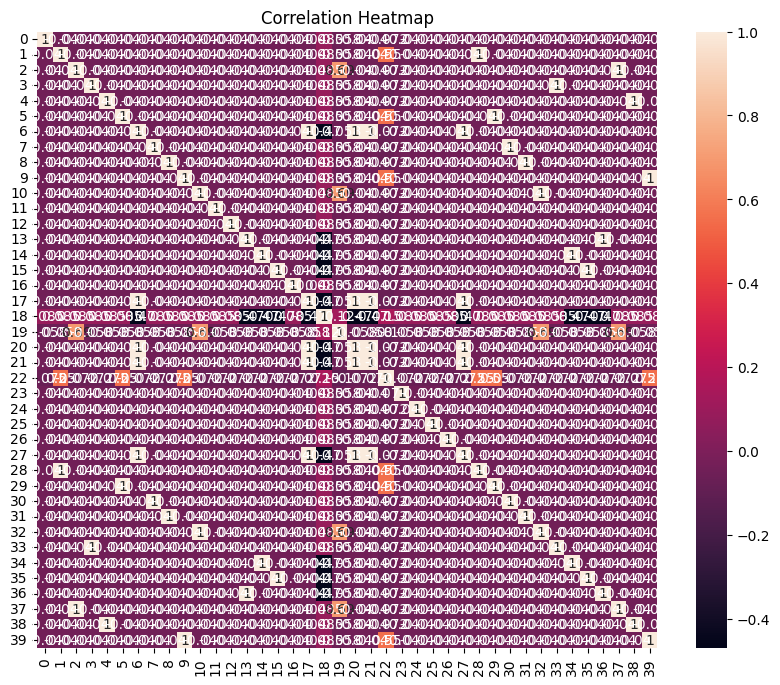

In [23]:
# Step 3: Perform Exploratory Data Analysis (EDA)
# Plot heatmap to see correlation
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(scaled_data).corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

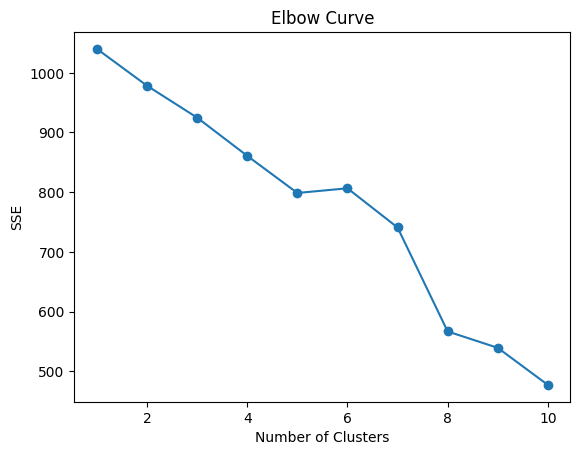

K-Means Silhouette Score: 0.12200663952327839


In [24]:
# Step 4: Implement K-Means Clustering
# Find optimal K using Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Apply KMeans with optimal K (choose K from elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Silhouette Score for K-Means
print(f"K-Means Silhouette Score: {silhouette_score(scaled_data, kmeans_labels)}")


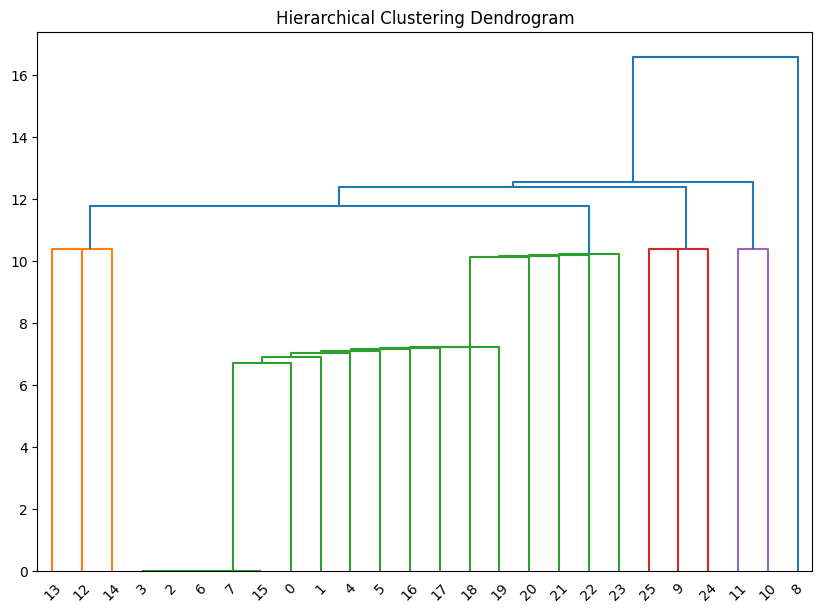

Hierarchical Clustering Silhouette Score: 0.18767511909632148


In [25]:
# Step 5: Implement Hierarchical Clustering
# Perform hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_data)

# Silhouette Score for Hierarchical
print(f"Hierarchical Clustering Silhouette Score: {silhouette_score(scaled_data, hierarchical_labels)}")

In [26]:
# Step 6: Implement DBSCAN Clustering
# Apply DBSCAN with initial epsilon and min_samples (you can tune these parameters)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Check how many unique labels were generated (including -1 for noise)
unique_labels = np.unique(dbscan_labels)
print(f"Unique labels in DBSCAN: {unique_labels}")

# Filter out the noise (-1) and calculate Silhouette Score only if there are 2 or more clusters
if len(unique_labels) > 1:  # This ensures there are at least two valid clusters
    non_noise_mask = dbscan_labels != -1  # Exclude noise
    if len(np.unique(dbscan_labels[non_noise_mask])) > 1:  # Ensure at least 2 clusters without noise
        dbscan_silhouette = silhouette_score(scaled_data[non_noise_mask], dbscan_labels[non_noise_mask])
        print(f"DBSCAN Silhouette Score (without noise): {dbscan_silhouette}")
    else:
        print("Not enough clusters for silhouette score (after removing noise).")
else:
    print("DBSCAN did not find enough clusters to compute a silhouette score.")


Unique labels in DBSCAN: [-1  0]
Not enough clusters for silhouette score (after removing noise).


 Import Libraries:

 pandas and numpy: For data manipulation and handling arrays.

matplotlib and seaborn: For visualizations (scatter plots, heatmaps, dendrograms).

scikit-learn (KMeans, DBSCAN, AgglomerativeClustering): To implement the clustering algorithms.

silhouette_score: Used to evaluate the quality of clusters.

StandardScaler: For feature scaling.
linkage, dendrogram: To create and visualize hierarchical clustering.

Load Dataset:

files.upload(): Prompts the user to upload the dataset file.

pd.read_excel(): Loads the dataset into a pandas DataFrame from the uploaded Excel file.

Data Preprocessing:

Handle missing values: The code fills any missing numeric values in the dataset with the column means (df.fillna(df.mean())).

Feature scaling: Numeric data is standardized using StandardScaler(), which transforms the features to have a mean of 0 and a standard deviation of 1. This ensures that all features are on the same scale, important for clustering algorithms like K-Means and DBSCAN.

 Exploratory Data Analysis (EDA):

 A correlation heatmap is plotted to examine the relationships between the variables in the dataset. This helps identify any strong correlations between features, which can influence clustering.

K-Means Clustering:

Finding the Optimal K
  
  Elbow Method: The code runs K-Means for different values of k (from 1 to 10) and plots the SSE (Sum of Squared Errors) for each value of k. The "elbow" in the plot indicates the optimal number of clusters.

  Applying K-Means:

  K-Means is applied with the optimal number of clusters (k=3).

The silhouette score evaluates how well the clusters are separated; higher scores indicate better-defined clusters.

 Hierarchical Clustering:

Creating Dendrogram
  
  Dendrogram: Hierarchical clustering is performed using the Ward method, and the dendrogram visualizes how the clusters are merged step-by-step. This helps identify the optimal number of clusters.

 Applying Agglomerative Clustering

 Agglomerative Clustering is applied with 3 clusters, and the silhouette score is calculated to evaluate the cluster quality.

 DBSCAN Clustering:

 DBSCAN is applied with eps=0.5 and min_samples=5.

eps: The maximum distance between two samples to be considered neighbors.

min_samples: The minimum number of points required to form a dense cluster.

The silhouette score is calculated excluding noise points (-1 labels), which indicates how well the remaining clusters are defined.

Visualizing the Clustering Results:

Scatter plots are used to visualize the clusters formed by K-Means, Hierarchical, and DBSCAN. Each point is colored according to its cluster label, allowing a visual understanding of how well the points are grouped.

Summary:

Preprocessing: Handle missing data, scale features.

EDA: Plot a correlation heatmap.
K-Means: Apply the elbow method, calculate silhouette score.

Hierarchical: Create dendrogram, apply Agglomerative Clustering, and evaluate with silhouette score.

DBSCAN: Cluster data based on density, filter noise, and calculate silhouette score.

Visualization: Plot the clustering results for all three methods.

This code provides a complete pipeline for applying and evaluating different clustering algorithms on your dataset.


